## MSCFE 650 GROUP 3-B SUBMISSION 2 - FEATURE ENGINEERING AND SELECTION.

### Group Members:

1. Gam Dieudonne Kimal
2. Joe Frank
3. Eniola Igunnu
4. Ndenge Gerald Atumu

## INTRODUCTION

In this document we will be using feature engineering and selection techniques on Google stock data from Yahoo finance ( our data from submission 1) for a five year period ending December 2019 to the determine which features are helpful in predicting the target variable and then forecast our data using the selected features. To arrive at our goal, we will:

1. Perform transforms
2. Perform other representation techniques
3. Choose between the variations of features here represented
4. Train and apply machine learning models


In compiling this project work codes were adapted from  the follwing sites:
1. https://www.youtube.com/watch?v=fOTGBo2BIOc
2. https://alphascientist.com/
3. https://medium.com/predictive-analytics-for-stock-market-prediction/machine-learning-algorithm-for-stock-prediction-e75c678d05c7
4. https://ucilnica.fri.uni-lj.si/mod/resource/view.php?id=28089


#### *Loading neccesary modules*

In [1]:
import yfinance as yf # Get data from web
import pandas as pd # tables and data manipulation
import numpy as np # vectors and matrices
import matplotlib.pyplot as plt # plots
%matplotlib inline
import matplotlib as mpl
import ta as ta
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from numpy import array
from sklearn.model_selection import KFold
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from scipy.cluster import hierarchy
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.model_selection import KFold



#### *Loading Google data*

In [2]:
goog = yf.download('GOOG', start = '2015-01-01', end = '2019-12-31')

# Convert index to datetime
goog.index = pd.to_datetime(goog.index)

print(goog.head())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-12-31  529.795471  531.141724  524.360352  524.958740  524.958740   
2015-01-02  527.561584  529.815369  522.665039  523.373108  523.373108   
2015-01-05  521.827332  522.894409  511.655243  512.463013  512.463013   
2015-01-06  513.589966  514.761719  499.678131  500.585632  500.585632   
2015-01-07  505.611847  505.855164  498.281952  499.727997  499.727997   

             Volume  
Date                 
2014-12-31  1368200  
2015-01-02  1447500  
2015-01-05  2059800  
2015-01-06  2899900  
2015-01-07  2065000  


C:\Users\gerard.ndenge\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


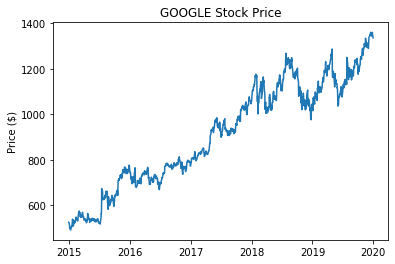

In [3]:
# Plotting the adjusted close of our stock info
plt.plot(goog.index, goog['Adj Close'])
plt.title('GOOGLE Stock Price')
plt.ylabel('Price ($)');
plt.show()

Already we can observe a rise in the stock price of google over the years with some very noticeable up and downward swings between 2018 and 2019

## A. FEATURE ENGINEERING - TRANSFORMS



In [4]:
Features = pd.DataFrame(index=goog.index).sort_index()


### i. Daily Log Return

In [5]:
Features['log_return'] = ta.others.daily_log_return(goog['Adj Close'], fillna=False)
Features.head() 

log_return
Date                  
2014-12-31         NaN
2015-01-02   -0.302506
2015-01-05   -2.106607
2015-01-06   -2.344986
2015-01-07   -0.171473

### ii. Log 



In [6]:
Features['log_Cls'] = goog['Adj Close'].apply(np.log)
Features.head() 

log_return   log_Cls
Date                            
2014-12-31         NaN  6.263320
2015-01-02   -0.302506  6.260295
2015-01-05   -2.106607  6.239229
2015-01-06   -2.344986  6.215779
2015-01-07   -0.171473  6.214064

### iii. Relative Strength Index

In [7]:
Features['rsi'] = ta.momentum.rsi(goog['Adj Close'], fillna=False)
Features.head()

log_return   log_Cls    rsi
Date                                   
2014-12-31         NaN  6.263320  100.0
2015-01-02   -0.302506  6.260295    0.0
2015-01-05   -2.106607  6.239229    0.0
2015-01-06   -2.344986  6.215779    0.0
2015-01-07   -0.171473  6.214064    0.0

### iv. Differencing 

In [8]:
Features['Diff_Cls'] = goog['Adj Close'].diff()
Features.head()

log_return   log_Cls    rsi   Diff_Cls
Date                                              
2014-12-31         NaN  6.263320  100.0        NaN
2015-01-02   -0.302506  6.260295    0.0  -1.585632
2015-01-05   -2.106607  6.239229    0.0 -10.910095
2015-01-06   -2.344986  6.215779    0.0 -11.877380
2015-01-07   -0.171473  6.214064    0.0  -0.857635

### v. Stochastic Oscillator



In [9]:
Features['stoc_Osc'] = ta.momentum.stoch(goog['High'], goog['Low'], goog['Adj Close'], fillna=False)
Features.head()

log_return   log_Cls    rsi   Diff_Cls  stoc_Osc
Date                                                        
2014-12-31         NaN  6.263320  100.0        NaN  8.824006
2015-01-02   -0.302506  6.260295    0.0  -1.585632  8.353134
2015-01-05   -2.106607  6.239229    0.0 -10.910095  4.145283
2015-01-06   -2.344986  6.215779    0.0 -11.877380  2.884290
2015-01-07   -0.171473  6.214064    0.0  -0.857635  4.400654

### vi. Rate of Change 

In [10]:
Features['rt_Of_ch'] = goog['Adj Close'].pct_change()
Features['P_chg'] = (goog['Adj Close']- goog['Volume']/goog['Volume']*100)
Features.head()

log_return   log_Cls    rsi   Diff_Cls  stoc_Osc  rt_Of_ch  \
Date                                                                     
2014-12-31         NaN  6.263320  100.0        NaN  8.824006       NaN   
2015-01-02   -0.302506  6.260295    0.0  -1.585632  8.353134 -0.003020   
2015-01-05   -2.106607  6.239229    0.0 -10.910095  4.145283 -0.020846   
2015-01-06   -2.344986  6.215779    0.0 -11.877380  2.884290 -0.023177   
2015-01-07   -0.171473  6.214064    0.0  -0.857635  4.400654 -0.001713   

                 P_chg  
Date                    
2014-12-31  424.958740  
2015-01-02  423.373108  
2015-01-05  412.463013  
2015-01-06  400.585632  
2015-01-07  399.727997

### vii. Average True Range (ATR)

In [11]:
Features['ATR'] = ta.volatility.average_true_range(goog['High'], goog['Low'], goog['Adj Close'], fillna=False)
Features.head()

log_return   log_Cls    rsi   Diff_Cls  stoc_Osc  rt_Of_ch  \
Date                                                                     
2014-12-31         NaN  6.263320  100.0        NaN  8.824006       NaN   
2015-01-02   -0.302506  6.260295    0.0  -1.585632  8.353134 -0.003020   
2015-01-05   -2.106607  6.239229    0.0 -10.910095  4.145283 -0.020846   
2015-01-06   -2.344986  6.215779    0.0 -11.877380  2.884290 -0.023177   
2015-01-07   -0.171473  6.214064    0.0  -0.857635  4.400654 -0.001713   

                 P_chg  ATR  
Date                         
2014-12-31  424.958740  0.0  
2015-01-02  423.373108  0.0  
2015-01-05  412.463013  0.0  
2015-01-06  400.585632  0.0  
2015-01-07  399.727997  0.0

### viii. High Low Percent

In [12]:
Features['hlo_pct'] = (goog['High']- goog['Low']/goog['Adj Close']*100)
Features.head()

log_return   log_Cls    rsi   Diff_Cls  stoc_Osc  rt_Of_ch  \
Date                                                                     
2014-12-31         NaN  6.263320  100.0        NaN  8.824006       NaN   
2015-01-02   -0.302506  6.260295    0.0  -1.585632  8.353134 -0.003020   
2015-01-05   -2.106607  6.239229    0.0 -10.910095  4.145283 -0.020846   
2015-01-06   -2.344986  6.215779    0.0 -11.877380  2.884290 -0.023177   
2015-01-07   -0.171473  6.214064    0.0  -0.857635  4.400654 -0.001713   

                 P_chg  ATR     hlo_pct  
Date                                     
2014-12-31  424.958740  0.0  431.255711  
2015-01-02  423.373108  0.0  429.950658  
2015-01-05  412.463013  0.0  423.052034  
2015-01-06  400.585632  0.0  414.943007  
2015-01-07  399.727997  0.0  406.144530

### ix. Z-Score



In [13]:
Features['Z_score'] = stats.zscore(goog['Adj Close'])
Features.head() 

log_return   log_Cls    rsi   Diff_Cls  stoc_Osc  rt_Of_ch  \
Date                                                                     
2014-12-31         NaN  6.263320  100.0        NaN  8.824006       NaN   
2015-01-02   -0.302506  6.260295    0.0  -1.585632  8.353134 -0.003020   
2015-01-05   -2.106607  6.239229    0.0 -10.910095  4.145283 -0.020846   
2015-01-06   -2.344986  6.215779    0.0 -11.877380  2.884290 -0.023177   
2015-01-07   -0.171473  6.214064    0.0  -0.857635  4.400654 -0.001713   

                 P_chg  ATR     hlo_pct   Z_score  
Date                                               
2014-12-31  424.958740  0.0  431.255711 -1.680605  
2015-01-02  423.373108  0.0  429.950658 -1.687473  
2015-01-05  412.463013  0.0  423.052034 -1.734728  
2015-01-06  400.585632  0.0  414.943007 -1.786174  
2015-01-07  399.727997  0.0  406.144530 -1.789888

### x. Exponential Smoothing

In [14]:
Features['EMA_50d'] = goog['Adj Close'].ewm(span=50, adjust=False).mean()
Features.head()


log_return   log_Cls    rsi   Diff_Cls  stoc_Osc  rt_Of_ch  \
Date                                                                     
2014-12-31         NaN  6.263320  100.0        NaN  8.824006       NaN   
2015-01-02   -0.302506  6.260295    0.0  -1.585632  8.353134 -0.003020   
2015-01-05   -2.106607  6.239229    0.0 -10.910095  4.145283 -0.020846   
2015-01-06   -2.344986  6.215779    0.0 -11.877380  2.884290 -0.023177   
2015-01-07   -0.171473  6.214064    0.0  -0.857635  4.400654 -0.001713   

                 P_chg  ATR     hlo_pct   Z_score     EMA_50d  
Date                                                           
2014-12-31  424.958740  0.0  431.255711 -1.680605  524.958740  
2015-01-02  423.373108  0.0  429.950658 -1.687473  524.896559  
2015-01-05  412.463013  0.0  423.052034 -1.734728  524.408969  
2015-01-06  400.585632  0.0  414.943007 -1.786174  523.474720  
2015-01-07  399.727997  0.0  406.144530 -1.789888  522.543476

## B. FEATURE ENGINEERING  - Other representations




### i. Principal Component Analysis

In [46]:
Features['Adj_close'] = goog["Adj Close"]
Features = Features.dropna()

encoder = LabelEncoder()

for col in Features.columns:
   Features[col] = encoder.fit_transform(Features[col])

X_features = Features.iloc[:,0:11]
y_label = Features.iloc[:,-1]


In [49]:
# Scale the features
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

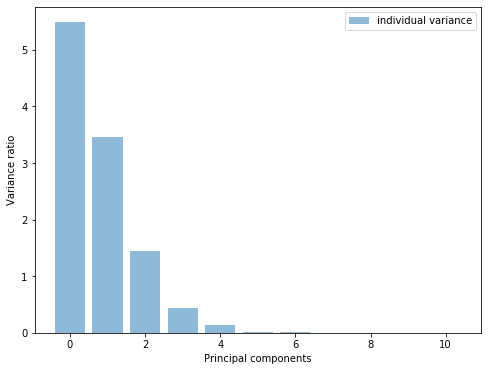

In [54]:
# Visualize
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(11), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

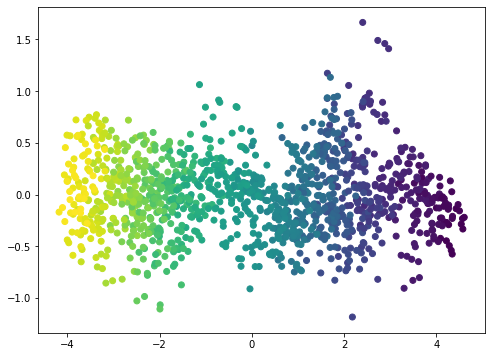

In [59]:
pca2 = PCA(n_components=5)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,4], c=Features['Adj_close'])
plt.show()

### ii. One-Hot Encoding

In [19]:
month_of_year = goog.index.get_level_values(level='Date').month
one_hot_frame = pd.DataFrame(pd.get_dummies(month_of_year))
one_hot_frame.index = goog.index

In [20]:
feat_names = ['feat_01','feat_02','feat_03','feat_04','feat_05','feat_06','feat_07','feat_08','feat_09','feat_10','feat_11','feat_12']
one_hot_frame.columns = feat_names
OHfeatures = Features.join(one_hot_frame)
print(OHfeatures.iloc[:,-12:].tail())

            feat_01  feat_02  feat_03  feat_04  feat_05  feat_06  feat_07  \
Date                                                                        
2019-12-23        0        0        0        0        0        0        0   
2019-12-24        0        0        0        0        0        0        0   
2019-12-26        0        0        0        0        0        0        0   
2019-12-27        0        0        0        0        0        0        0   
2019-12-30        0        0        0        0        0        0        0   

            feat_08  feat_09  feat_10  feat_11  feat_12  
Date                                                     
2019-12-23        0        0        0        0        1  
2019-12-24        0        0        0        0        1  
2019-12-26        0        0        0        0        1  
2019-12-27        0        0        0        0        1  
2019-12-30        0        0        0        0        1  


## C. FEATURE SELECTION

In [60]:
X = Features.loc[:,['log_return','log_Cls', 'rsi', 'Diff_Cls', 'stoc_Osc', 'rt_Of_ch','P_chg','ATR','hlo_pct','Z_score','EMA_50d']]
Y = Features.loc[:,['Adj_close']]

# standardize or normalize data 
std_scaler = StandardScaler()
features_scaled = std_scaler.fit_transform(X) 
print (features_scaled.shape)
X_df = pd.DataFrame(features_scaled,index=X.index)
X_df.columns = X.columns
X_df.tail()

# standardize Target 
Y_scaled = std_scaler.fit_transform(Y) 
Y_scaled = pd.DataFrame(Y_scaled,index=Y.index)
Y_scaled.columns = Y.columns
print(Y_scaled.tail())

(1257, 11)
            Adj_close
Date                 
2019-12-23   1.709961
2019-12-24   1.698807
2019-12-26   1.729480
2019-12-27   1.718326
2019-12-30   1.693231


C:\Users\gerard.ndenge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gerard.ndenge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\gerard.ndenge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gerard.ndenge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


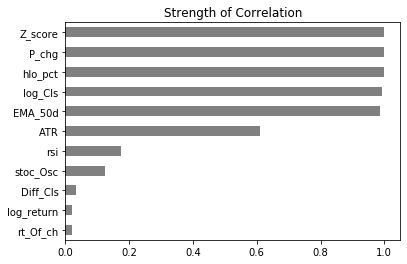

In [22]:
corr = X_df.corrwith(Y['Adj_close'])
corr.sort_values().plot.barh(color = 'gray',title = 'Strength of Correlation')

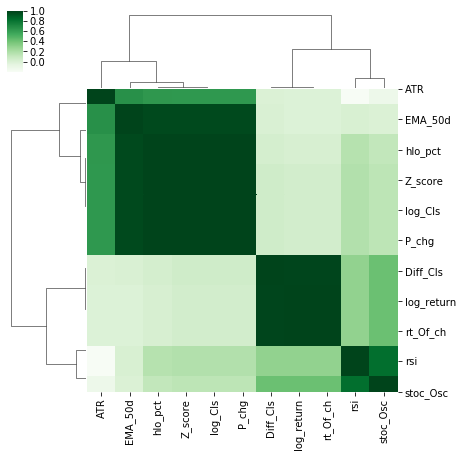

In [61]:
corr_matrix = X_df.corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), \
                            method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(7,7),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

C:\Users\gerard.ndenge\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


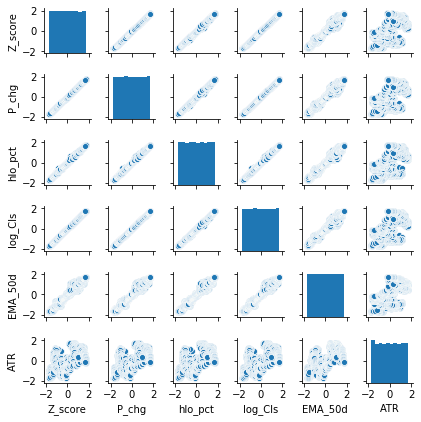

In [63]:
selected_features = ['Z_score','P_chg','hlo_pct','log_Cls','EMA_50d','ATR']
sns.pairplot(X_df[selected_features],size=1.0)

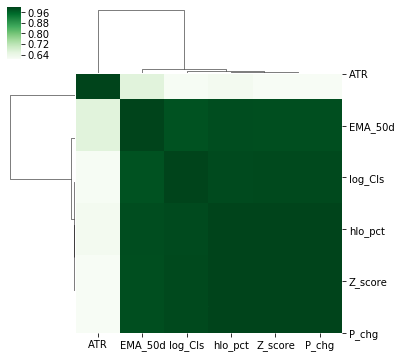

In [25]:
corr_matrix = X_df[selected_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

## D. Model Validation

### i. Walk-Forward

In [26]:
Model_Feat = X[selected_features]

X = Model_Feat.values
n_train = 100
n_records = len(X)
for i in range(n_train, n_records):
	train, test = X[0:i], X[i:i+1]
	print('train=%d, test=%d' % (len(train), len(test)))

train=100, test=1
train=101, test=1
train=102, test=1
train=103, test=1
train=104, test=1
train=105, test=1
train=106, test=1
train=107, test=1
train=108, test=1
train=109, test=1
train=110, test=1
train=111, test=1
train=112, test=1
train=113, test=1
train=114, test=1
train=115, test=1
train=116, test=1
train=117, test=1
train=118, test=1
train=119, test=1
train=120, test=1
train=121, test=1
train=122, test=1
train=123, test=1
train=124, test=1
train=125, test=1
train=126, test=1
train=127, test=1
train=128, test=1
train=129, test=1
train=130, test=1
train=131, test=1
train=132, test=1
train=133, test=1
train=134, test=1
train=135, test=1
train=136, test=1
train=137, test=1
train=138, test=1
train=139, test=1
train=140, test=1
train=141, test=1
train=142, test=1
train=143, test=1
train=144, test=1
train=145, test=1
train=146, test=1
train=147, test=1
train=148, test=1
train=149, test=1
train=150, test=1
train=151, test=1
train=152, test=1
train=153, test=1
train=154, test=1
train=155,

train=1236, test=1
train=1237, test=1
train=1238, test=1
train=1239, test=1
train=1240, test=1
train=1241, test=1
train=1242, test=1
train=1243, test=1
train=1244, test=1
train=1245, test=1
train=1246, test=1
train=1247, test=1
train=1248, test=1
train=1249, test=1
train=1250, test=1
train=1251, test=1
train=1252, test=1
train=1253, test=1
train=1254, test=1
train=1255, test=1
train=1256, test=1


### iii. K-Fold

In [27]:

kf = KFold(n_splits=2)
kf.get_n_splits(Model_Feat)
print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)

for train_index, test_index in kf.split(Model_Feat):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = Model_Feat[train_index], Model_Feat[test_index]
    y_train, y_test = Y[train_index], Y[test_index]



KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [ 629  630  631  632  633  634  635  636  637  638  639  640  641  642
  643  644  645  646  647  648  649  650  651  652  653  654  655  656
  657  658  659  660  661  662  663  664  665  666  667  668  669  670
  671  672  673  674  675  676  677  678  679  680  681  682  683  684
  685  686  687  688  689  690  691  692  693  694  695  696  697  698
  699  700  701  702  703  704  705  706  707  708  709  710  711  712
  713  714  715  716  717  718  719  720  721  722  723  724  725  726
  727  728  729  730  731  732  733  734  735  736  737  738  739  740
  741  742  743  744  745  746  747  748  749  750  751  752  753  754
  755  756  757  758  759  760  761  762  763  764  765  766  767  768
  769  770  771  772  773  774  775  776  777  778  779  780  781  782
  783  784  785  786  787  788  789  790  791  792  793  794  795  796
  797  798  799  800  801  802  803  804  805  806  807  808  809  810
  811  812  813  8

KeyError: "None of [Int64Index([ 629,  630,  631,  632,  633,  634,  635,  636,  637,  638,\n            ...\n            1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256],\n           dtype='int64', length=628)] are in the [columns]"